In [ ]:
# DisulfideBond Class Analysis Dictionary creation
# Author: Eric G. Suchanek, PhD.
# (c) 2023 Eric G. Suchanek, PhD., All Rights Reserved
# License: MIT
# Last Modification: 2/18/23
# Cα Cβ Sγ

import pandas as pd
import numpy

import pyvista as pv
from pyvista import set_plot_theme

from Bio.PDB import *

# for using from the repo we 
import proteusPy
from proteusPy import *

from proteusPy.data import *
from proteusPy.Disulfide import *
from proteusPy.DisulfideList import DisulfideList, load_disulfides_from_id
from proteusPy.utility import print_memory_used
from proteusPy.DisulfideClasses import get_sixth_quadrant, create_six_class_df, get_section

# pyvista setup for notebooks
pv.set_jupyter_backend('trame')
#set_plot_theme('dark')

print_memory_used()
class_filename = f'{DATA_DIR}SS_consensus_class32.pkl'

PDB_SS = Load_PDB_SS(verbose=True, subset=False)
PDB_SS.describe()
print_memory_used()


In [ ]:
from proteusPy.data import DATA_DIR

class_filename = f'{DATA_DIR}SS_consensus_class32.pkl'
ss_examplars = DisulfideList([],'tmp')
with open(class_filename, 'rb') as f:
    ss_examplars = pickle.load(f)

ss_examplars.pdb_id = '.'

In [ ]:
ss_examplars.display(style='sb', light=False)

In [ ]:
def sslist_from_classid(classid: str, loader: DisulfideLoader, classdict: dict) -> DisulfideList:
    res = DisulfideList([], 'tmp')
    
    try:
        sslist = classdict[classid]
        res = DisulfideList([loader[ssid] for ssid in sslist], 'classid')
        return res
    except KeyError:
        print(f'No class: {classid}')

def list_binary_classes(ssdict):
    for k,v in enumerate(ssdict):
        print(f'Class: |{k}|, |{v}|')


In [ ]:
x1 = -120
q = get_sixth_quadrant(x1)
q

In [ ]:
x1 = -60
q = get_section(x1, 6)
q

In [ ]:
import matplotlib.pyplot as plt

def plot_class_chart(classes: int) -> None:
    """
    Create a Matplotlib pie chart with `classes` segments of equal size.

    Parameters:
        classes (int): The number of segments to create in the pie chart.

    Returns:
        None

    Example:
    >>> plot_class_chart(4)

    This will create a pie chart with 4 equal segments.
    """

    # Create a list of segment labels
    labels = [f'Class {i+1}' for i in range(classes)]

    # Create a list of segment values
    values = [1 for _ in range(classes)]

    # Create the pie chart
    fig, ax = plt.subplots()
    ax.pie(values, labels=labels, startangle=0 / classes, counterclock=True)

    # Set the chart title and size
    ax.set_title(f'{classes}-Class Pie Chart')
    fig.set_size_inches(6, 6)

    # Set the segment colors
    color_palette = plt.cm.get_cmap('tab20', classes)
    ax.set_prop_cycle('color', [color_palette(i) for i in range(classes)])

    # Show the chart
    plt.show()

plot_class_chart(6)

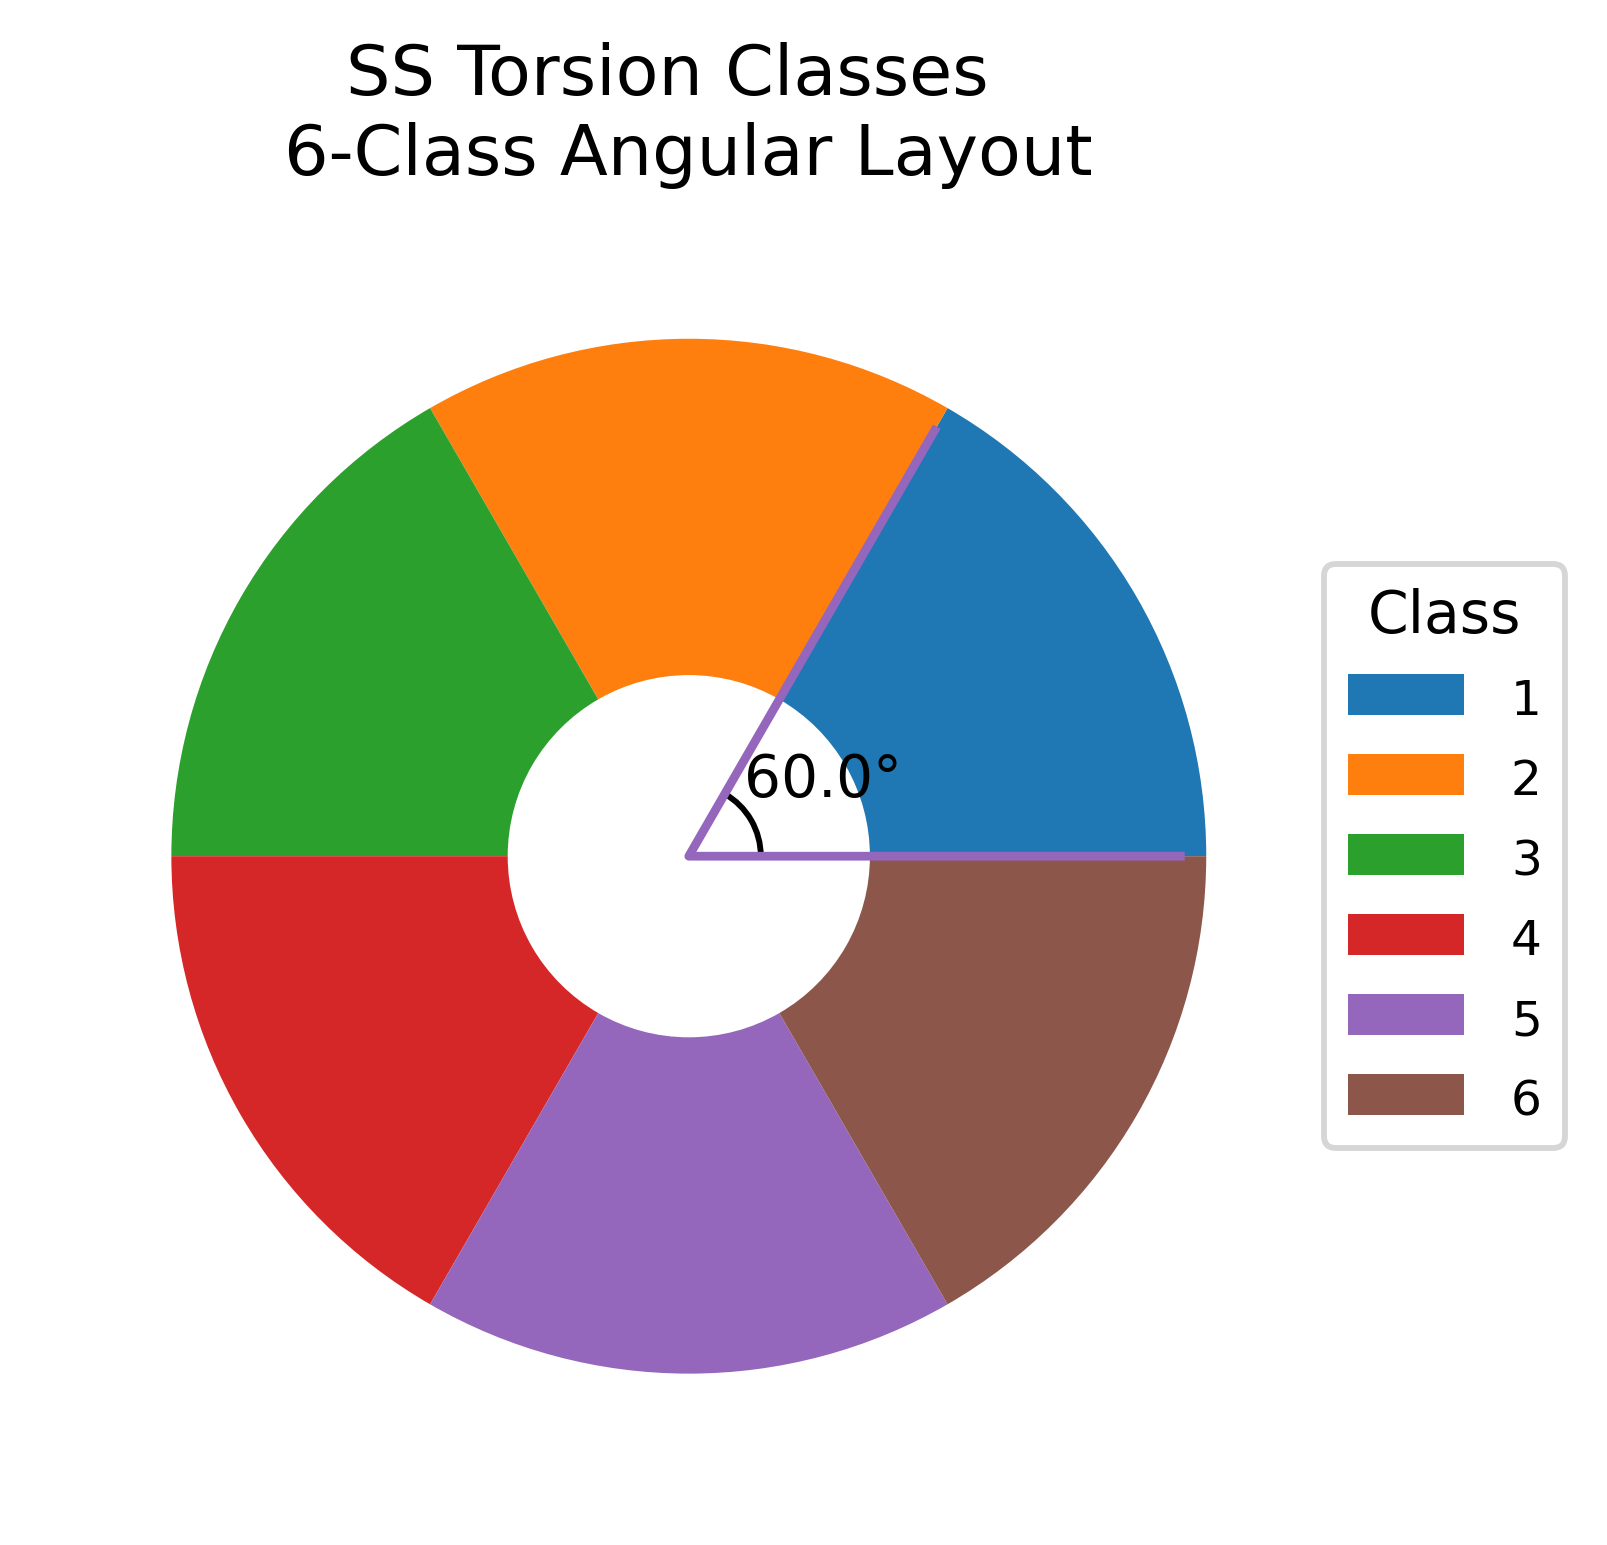

In [1]:
import matplotlib.pyplot as plt
WIDTH = 6
HEIGHT = 6
DPI = 420



   


plot_class_chart(6)

In [ ]:
plot_class_chart(6)

In [ ]:
plot_class_chart(6)

In [ ]:
from pytube import YouTube

link = input("Enter a youtube video's URL") # i.e. https://youtu.be/dQw4w9WgXcQ

yt = YouTube(link)
yt.streams.first().download()

print("downloaded", link)

In [ ]:
#########################################################################
# .. _angle-annotation-usage:
#
# Usage
# ~~~~~
#
# Required arguments to ``AngleAnnotation`` are the center of the arc, *xy*,
# and two points, such that the arc spans between the two vectors connecting
# *p1* and *p2* with *xy*, respectively. Those are given in data coordinates.
# Further arguments are the *size* of the arc and its *unit*. Additionally, a
# *text* can be specified, that will be drawn either in- or outside of the arc,
# according to the value of *textposition*. Usage of those arguments is shown
# below.

from proteusPy.angle_annotation import AngleAnnotation, plot_angle
import matplotlib.pyplot as plt
import numpy as np



fig, ax = plt.subplots()
fig.canvas.draw()  # Need to draw the figure to define renderer
ax.set_title("AngleLabel example")

# Plot two crossing lines and label each angle between them with the above
# ``AngleAnnotation`` tool.
center = (4.5, 650)
p1 = [(2.5, 710), (6.0, 605)]
p2 = [(3.0, 275), (5.5, 900)]
line1, = ax.plot(*zip(*p1))
line2, = ax.plot(*zip(*p2))
point, = ax.plot(*center, marker="o")

am1 = AngleAnnotation(center, p1[1], p2[1], ax=ax, size=75, text=r"$\alpha$")
am2 = AngleAnnotation(center, p2[1], p1[0], ax=ax, size=35, text=r"$\beta$")
am3 = AngleAnnotation(center, p1[0], p2[0], ax=ax, size=75, text=r"$\gamma$")
am4 = AngleAnnotation(center, p2[0], p1[1], ax=ax, size=35, text=r"$\theta$")


# Showcase some styling options for the angle arc, as well as the text.
p = [(6.0, 400), (5.3, 410), (5.6, 300)]
ax.plot(*zip(*p))
am5 = AngleAnnotation(p[1], p[0], p[2], ax=ax, size=40, text=r"$\Phi$",
                      linestyle="--", color="gray", textposition="outside",
                      text_kw=dict(fontsize=16, color="gray"))


#########################################################################
# ``AngleLabel`` options
# ~~~~~~~~~~~~~~~~~~~~~~
#
# The *textposition* and *unit* keyword arguments may be used to modify the
# location of the text label, as shown below:
import matplotlib.pyplot as plt

# Helper function to draw angle easily.
def plot_angle(ax, pos, angle, length=0.95, acol="C0", **kwargs):
    vec2 = np.array([np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle))])
    xy = np.c_[[length, 0], [0, 0], vec2*length].T + np.array(pos)
    ax.plot(*xy.T, color=acol)
    return AngleAnnotation(pos, xy[0], xy[2], ax=ax, **kwargs)


fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
fig.suptitle("AngleLabel keyword arguments")
fig.canvas.draw()  # Need to draw the figure to define renderer

# Showcase different text positions.
ax1.margins(y=0.4)
ax1.set_title("textposition")
kw = dict(size=75, unit="points", text=r"$60°$")

am6 = plot_angle(ax1, (2.0, 0), 60, textposition="inside", **kw)
am7 = plot_angle(ax1, (3.5, 0), 60, textposition="outside", **kw)
am8 = plot_angle(ax1, (5.0, 0), 60, textposition="edge",
                 text_kw=dict(bbox=dict(boxstyle="round", fc="w")), **kw)
am9 = plot_angle(ax1, (6.5, 0), 60, textposition="edge",
                 text_kw=dict(xytext=(30, 20), arrowprops=dict(arrowstyle="->",
                              connectionstyle="arc3,rad=-0.2")), **kw)

for x, text in zip([2.0, 3.5, 5.0, 6.5], ['"inside"', '"outside"', '"edge"',
                                          '"edge", custom arrow']):
    ax1.annotate(text, xy=(x, 0), xycoords=ax1.get_xaxis_transform(),
                 bbox=dict(boxstyle="round", fc="w"), ha="left", fontsize=8,
                 annotation_clip=True)

# Showcase different size units. The effect of this can best be observed
# by interactively changing the figure size
ax2.margins(y=0.4)
ax2.set_title("unit")
kw = dict(text=r"$60°$", textposition="outside")

am10 = plot_angle(ax2, (2.0, 0), 60, size=50, unit="pixels", **kw)
am11 = plot_angle(ax2, (3.5, 0), 60, size=50, unit="points", **kw)
am12 = plot_angle(ax2, (5.0, 0), 60, size=0.25, unit="axes min", **kw)
am13 = plot_angle(ax2, (6.5, 0), 60, size=0.25, unit="axes max", **kw)

for x, text in zip([2.0, 3.5, 5.0, 6.5], ['"pixels"', '"points"',
                                          '"axes min"', '"axes max"']):
    ax2.annotate(text, xy=(x, 0), xycoords=ax2.get_xaxis_transform(),
                 bbox=dict(boxstyle="round", fc="w"), ha="left", fontsize=8,
                 annotation_clip=True)

plt.show()
